<a href="https://colab.research.google.com/github/SepehrSal/Diabetes-Progression-Regression-models/blob/main/Diabetes-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diabetes Dataset
We are going to predict the disease progression of 442 diabetes patients.
This is one of avalable datasets in sklearn library.
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n =442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).


## Imports
** Importing pandas, numpy, and seaborn.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

We'll work with the diabetes dataset from the sklearn dataset. It has patients info, suchas age, sex, body mass index, average blood pressure, and six blood serum measurements.

* Reading the diabetes dataset from the sklearn.**

In [34]:
from sklearn.datasets import load_diabetes

In [35]:
diabetes=load_diabetes()

The data set is presented in a dictionary form:

In [36]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

We can grab information and arrays out of this dictionary to set up our data frame and understanding of the features:

In [37]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [38]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## Set up DataFrame

In [39]:
df_feat=pd.DataFrame(data=diabetes['data'],columns=diabetes['feature_names'])
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [40]:
df_target=pd.DataFrame(data=diabetes['target'],columns=['result'])
df_target.head()

,result
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


now lets concatinate our dataframes to start EDA

In [41]:
df=pd.concat([df_feat,df_target],axis=1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,result
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# Exploratory Data Analysis

**Let's explore these types of relationships across the entire data set.

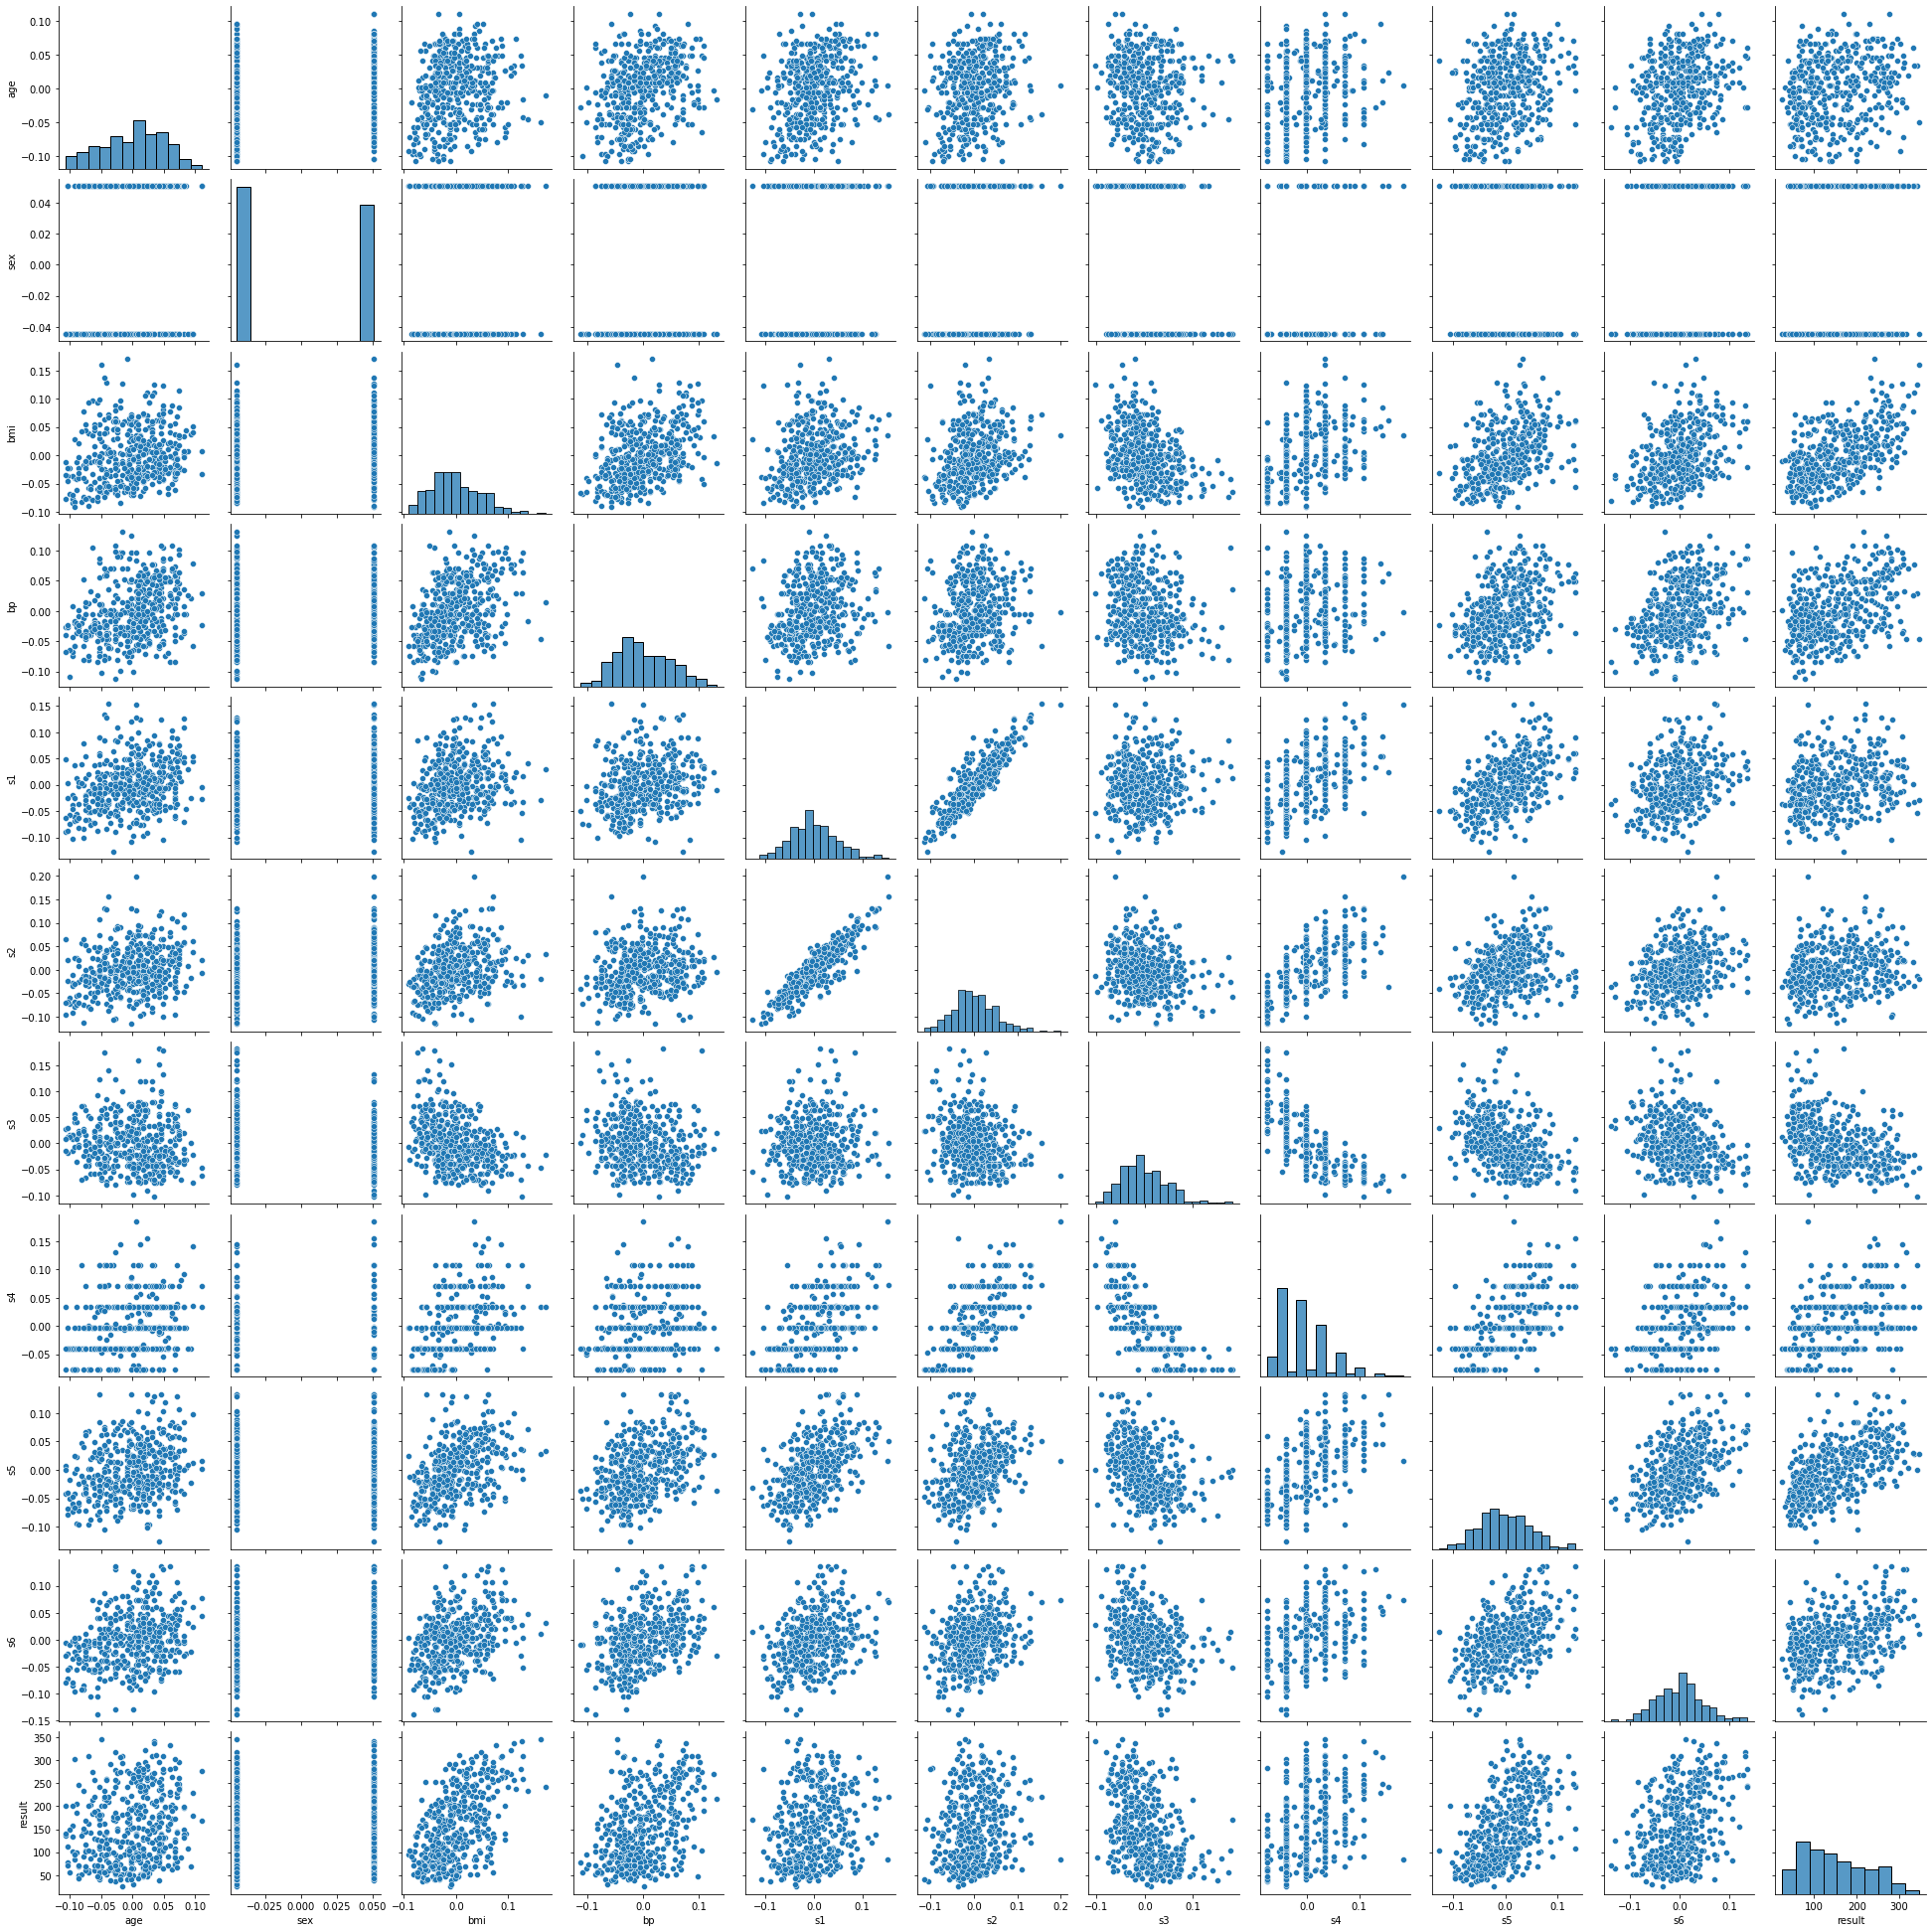

In [42]:
sns.pairplot(df)

Based off this plot looks to be the most correlated features with Results are bmi and s5(ltg, possibly log of serum triglycerides level)
now we are going to creat lmplot with two features.

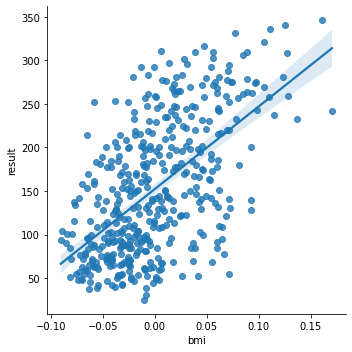

In [43]:
sns.lmplot(data=df,x='bmi',y='result')

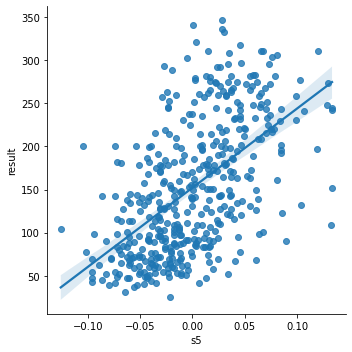

In [44]:
sns.lmplot(data=df,x='s5',y='result')

lets plot out hist plot of result and make a showing correlation between features with a heatmap

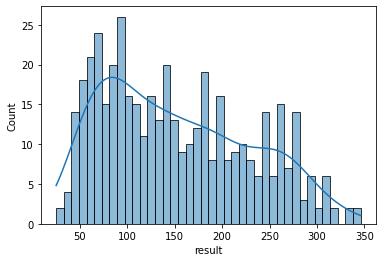

In [45]:
sns.histplot(df['result'],bins=40,kde=True )

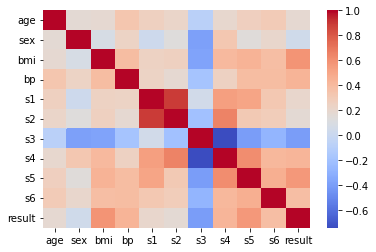

In [46]:
sns.heatmap(df.corr(),cmap='coolwarm')

## Training Models

### X and y arrays

In [47]:
X = df_feat
y = df_target

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Training the Model



In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [51]:
lmPrediction=lm.predict(X_test)

** Creating a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

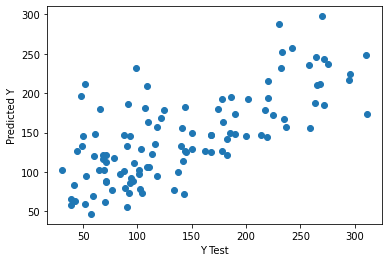

In [52]:
plt.scatter(y_test,lmPrediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [53]:
from sklearn import metrics

In [54]:
print('lm.MAE:', metrics.mean_absolute_error(y_test, lmPrediction))
print('lm.MSE:', metrics.mean_squared_error(y_test, lmPrediction))
print('lm.RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lmPrediction)))

lm.MAE: 41.40826607998418
lm.MSE: 2838.4021656479645
lm.RMSE: 53.276656855023894


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


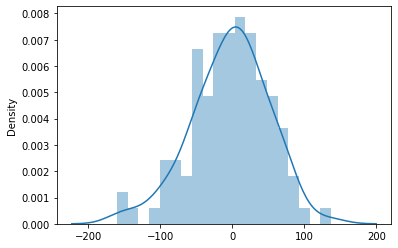

In [55]:
sns.distplot((y_test-lmPrediction),bins=20);

## Training More Models
we are going to see if we can training better models

** Lasso, SVR and RandomForest **

In [56]:
#Lasso Regression
from sklearn.linear_model import LinearRegression, Lasso
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train,)
lassoPrediction=lasso.predict(X_test)

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, lassoPrediction))
print('MSE:', metrics.mean_squared_error(y_test, lassoPrediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lassoPrediction)))

MAE: 41.76046675942095
MSE: 2826.5148423207697
RMSE: 53.16497759165116


In [58]:
#SVR
from sklearn.svm import SVR
SVC=SVR()
SVC.fit(X_train, y_train)
SVCpredictions = SVC.predict( X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
print('MAE:', metrics.mean_absolute_error(y_test, SVCpredictions))
print('MSE:', metrics.mean_squared_error(y_test, SVCpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, SVCpredictions)))

MAE: 57.938356795705424
MSE: 4541.199774653997
RMSE: 67.38842463401261


# Gridsearch

Finding the right parameters (like what C or gamma values to use)

In [60]:
#SVR Grid search
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
SVRgrid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
SVRgrid.fit(X_train,y_train)
SVRgrid.best_params_


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.054 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.080 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.002 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.023 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.013 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.057 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.057 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.057 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.082 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.057 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 1/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.026 total time=   0.0s
[CV 2/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.057 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.029 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.015 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.054 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 2/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.080 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.002 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.023 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.012 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.057 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.057 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 4/5] END .....C=1, gamma

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.016 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.172 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.122 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.220 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.161 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.210 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.024 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.055 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.030 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.017 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.054 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-0.080 total time=   0.0s
[CV 3/5] END ......C=10, gam

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.057 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.001 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 4/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 5/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-0.015 total time=   0.0s
[CV 1/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.057 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 3/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 4/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 5/5] END ...C=10, gamma=0.0001, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.374 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.465 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.359 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.474 total time=   0.0s
[CV 1/5] END ......C=100, ga

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.024 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.055 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.030 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.01, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.017 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.054 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.080 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.002 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.023 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.001, kernel=rbf;, score=-0.012 total time=   0.0s
[CV 1/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.057 total time=   0.0s
[CV 2/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.082 total time=   0.0s
[CV 3/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.001 total time=   0.0s
[CV 4/5] END ..C=100, gamma=0.0001, kernel=rbf;, score=-0.025 total time=   0.0s
[CV 5/5] END ..C=100, gamma=

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.481 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.334 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.496 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.578 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.378 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.462 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.362 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.474 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.184 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.132 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.227 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.168 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.224 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.001, kernel=rbf;, score=-0.024 total time=   0.0s
[CV 2/5] END ..C=1000, gamma

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.054 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.080 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.002 total time=   0.0s
[CV 4/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.023 total time=   0.0s
[CV 5/5] END .C=1000, gamma=0.0001, kernel=rbf;, score=-0.012 total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [61]:
SVRgrid_predictions = SVRgrid.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, SVRgrid_predictions))
print('MSE:', metrics.mean_squared_error(y_test, SVRgrid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, SVRgrid_predictions)))

MAE: 42.04810747602831
MSE: 2799.6814925695044
RMSE: 52.91201652337118


In [62]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rfpredictions = rf.predict( X_test)

<ipython-input-62-83a1ec27ae95>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, rfpredictions))
print('MSE:', metrics.mean_squared_error(y_test, rfpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfpredictions)))

MAE: 41.59693693693693
MSE: 2527.173504504505
RMSE: 50.27100063162166


# Comparing different models
now we compare RMSE of all models we trained.

In [64]:
print('LM.RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lmPrediction)))
print('Lasso.RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lassoPrediction)))
print('SVR.RMSE:', np.sqrt(metrics.mean_squared_error(y_test, SVRgrid_predictions)))
print('RF.RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfpredictions)))

LM.RMSE: 53.276656855023894
Lasso.RMSE: 53.16497759165116
SVR.RMSE: 52.91201652337118
RF.RMSE: 50.27100063162166
